<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

#### Name: Akul Arun
#### Student ID: S10243523

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 653.6 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.6 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


*Note: More Packages will be imported along the way

## Step 1: Data Loading

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

## Step 2:  Testing Model Architecture & Hyperparameter Tuning

### Test 1: Testing convergence by removing second last dense layer which had 512 nodes



In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(10, activation='softmax'))


In [4]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_1.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
375/375 [==============================] - ETA: 0s - loss: 2.2218 - acc: 0.1723
Epoch 1: val_loss improved from inf to 2.06069, saving model to Arch_1.keras
375/375 [==============================] - 109s 268ms/step - loss: 2.2218 - acc: 0.1723 - val_loss: 2.0607 - val_acc: 0.2775
Epoch 2/120
375/375 [==============================] - ETA: 0s - loss: 2.0778 - acc: 0.2536
Epoch 2: val_loss improved from 2.06069 to 1.96021, saving model to Arch_1.keras
375/375 [==============================] - 107s 286ms/step - loss: 2.0778 - acc: 0.2536 - val_loss: 1.9602 - val_acc: 0.3075
Epoch 3/120
375/375 [==============================] - ETA: 0s - loss: 2.0151 - acc: 0.2836
Epoch 3: val_loss did not improve from 1.96021
375/375 [==============================] - 117s 311ms/step - loss: 2.0151 - acc: 0.2836 - val_loss: 1.9907 - val_acc: 0.2865
Epoch 4/120
375/375 [==============================] - ETA: 0s - loss: 1.9594 - acc: 0.3165
Epoch 4: val_loss improved from 1.96021 to 1.87234, 

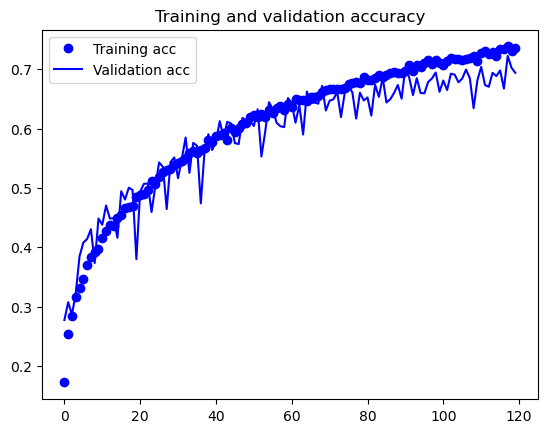

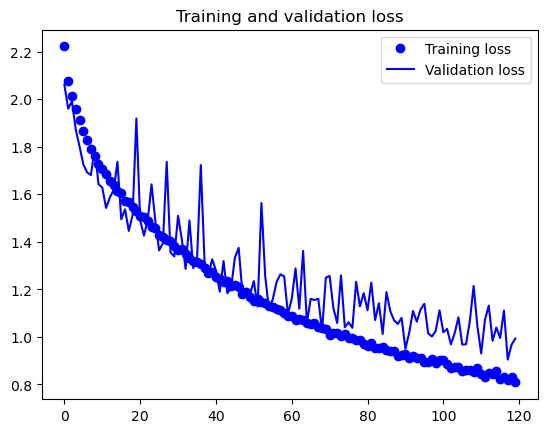

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_1 = keras.models.load_model('Arch_1.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = test_1.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 5s 65ms/step - loss: 0.8421 - acc: 0.7700
Test Loss: 0.8421054482460022
Test Accuracy: 0.7699999809265137


### Test 2: Testing Noise Reduction and learning speed by Adding Batch Normalisation and Making model more complex by adding more layers

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
# Build the Model
from tensorflow.keras import layers, models

img_size = 224

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(32, (3, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(10, activation='softmax'))


In [4]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 220, 220, 32)      0

In [5]:
from tensorflow.keras import optimizers

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_2.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_2 = model_2.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
375/375 [==============================] - ETA: 0s - loss: 2.3532 - acc: 0.2227
Epoch 1: val_loss improved from inf to 2.21219, saving model to Arch_2.keras
375/375 [==============================] - 114s 287ms/step - loss: 2.3532 - acc: 0.2227 - val_loss: 2.2122 - val_acc: 0.2405
Epoch 2/120
375/375 [==============================] - ETA: 0s - loss: 2.0725 - acc: 0.2897
Epoch 2: val_loss did not improve from 2.21219
375/375 [==============================] - 126s 337ms/step - loss: 2.0725 - acc: 0.2897 - val_loss: 2.2259 - val_acc: 0.2840
Epoch 3/120
375/375 [==============================] - ETA: 0s - loss: 1.9564 - acc: 0.3228
Epoch 3: val_loss improved from 2.21219 to 2.02378, saving model to Arch_2.keras
375/375 [==============================] - 104s 276ms/step - loss: 1.9564 - acc: 0.3228 - val_loss: 2.0238 - val_acc: 0.3515
Epoch 4/120
375/375 [==============================] - ETA: 0s - loss: 1.8581 - acc: 0.3519
Epoch 4: val_loss did not improve from 2.02378
375/3

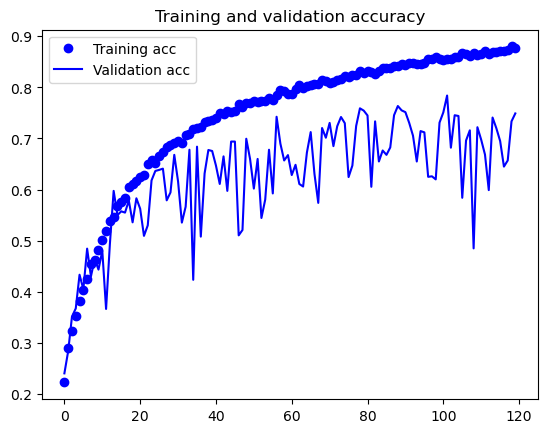

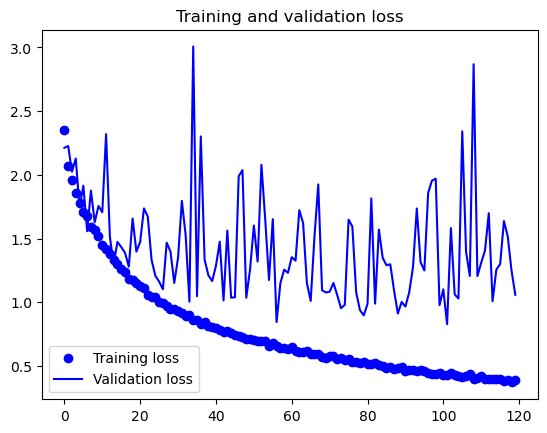

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [2]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_2 = keras.models.load_model('Arch_2.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = test_2.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 2s 59ms/step - loss: 0.8141 - acc: 0.7880
Test Loss: 0.8140667676925659
Test Accuracy: 0.7879999876022339


### Test 3: Determining if removing batch normalisation decreases noise

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
# Build the Model
from tensorflow.keras import layers, models

img_size = 224

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(32, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(10, activation='softmax'))

In [4]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 220, 220, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                        

In [5]:
from tensorflow.keras import optimizers

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_3.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_2 = model_2.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/50
375/375 [==============================] - ETA: 0s - loss: 2.2327 - acc: 0.1641
Epoch 1: val_loss improved from inf to 2.09420, saving model to Arch_3.keras
375/375 [==============================] - 109s 274ms/step - loss: 2.2327 - acc: 0.1641 - val_loss: 2.0942 - val_acc: 0.2375
Epoch 2/50
375/375 [==============================] - ETA: 0s - loss: 2.1275 - acc: 0.2245
Epoch 2: val_loss improved from 2.09420 to 1.99031, saving model to Arch_3.keras
375/375 [==============================] - 105s 279ms/step - loss: 2.1275 - acc: 0.2245 - val_loss: 1.9903 - val_acc: 0.2930
Epoch 3/50
375/375 [==============================] - ETA: 0s - loss: 2.0552 - acc: 0.2587
Epoch 3: val_loss did not improve from 1.99031
375/375 [==============================] - 101s 269ms/step - loss: 2.0552 - acc: 0.2587 - val_loss: 2.2212 - val_acc: 0.2040
Epoch 4/50
375/375 [==============================] - ETA: 0s - loss: 1.9961 - acc: 0.2937
Epoch 4: val_loss did not improve from 1.99031
375/375 [

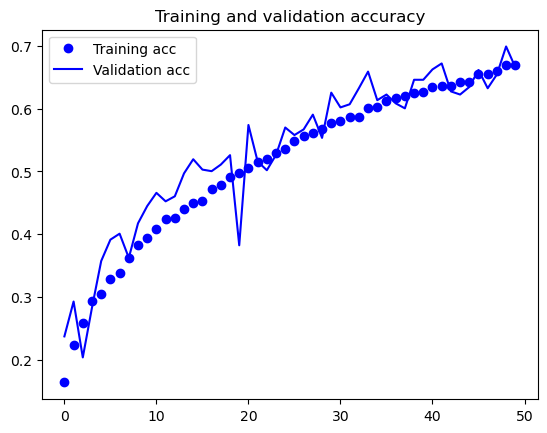

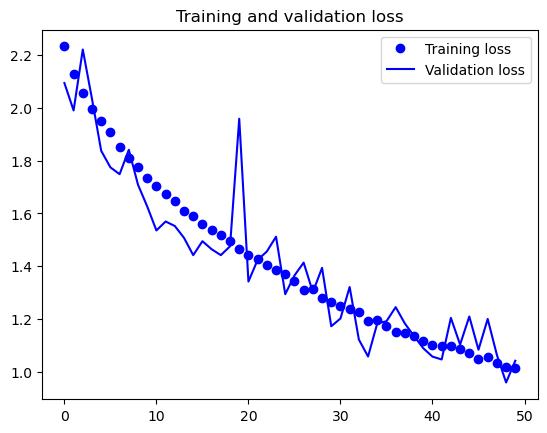

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_3 = keras.models.load_model('Arch_3.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = test_3.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 58ms/step - loss: 1.0104 - acc: 0.6880
Test Loss: 1.0104461908340454
Test Accuracy: 0.6880000233650208


### Test 4: Testing the swish activation function

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers, models

img_size = 224

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model_2.add(layers.Activation('swish'))  # Using Swish

model_2.add(layers.Conv2D(32, (3, 3)))
model_2.add(layers.Activation('swish'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('swish'))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('swish'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('swish'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('swish'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('swish'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('swish'))

model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(10, activation='softmax'))



In [4]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 220, 220, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                        

In [5]:
from tensorflow.keras import optimizers

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_4.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_2 = model_2.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
375/375 [==============================] - ETA: 0s - loss: 2.2361 - acc: 0.1629
Epoch 1: val_loss improved from inf to 2.18592, saving model to Arch_4.keras
375/375 [==============================] - 129s 325ms/step - loss: 2.2361 - acc: 0.1629 - val_loss: 2.1859 - val_acc: 0.1960
Epoch 2/120
375/375 [==============================] - ETA: 0s - loss: 2.2048 - acc: 0.1869
Epoch 2: val_loss improved from 2.18592 to 2.12837, saving model to Arch_4.keras
375/375 [==============================] - 138s 367ms/step - loss: 2.2048 - acc: 0.1869 - val_loss: 2.1284 - val_acc: 0.2205
Epoch 3/120
375/375 [==============================] - ETA: 0s - loss: 2.1403 - acc: 0.2248
Epoch 3: val_loss improved from 2.12837 to 2.06531, saving model to Arch_4.keras
375/375 [==============================] - 135s 360ms/step - loss: 2.1403 - acc: 0.2248 - val_loss: 2.0653 - val_acc: 0.2595
Epoch 4/120
375/375 [==============================] - ETA: 0s - loss: 2.1028 - acc: 0.2441
Epoch 4: val_loss 

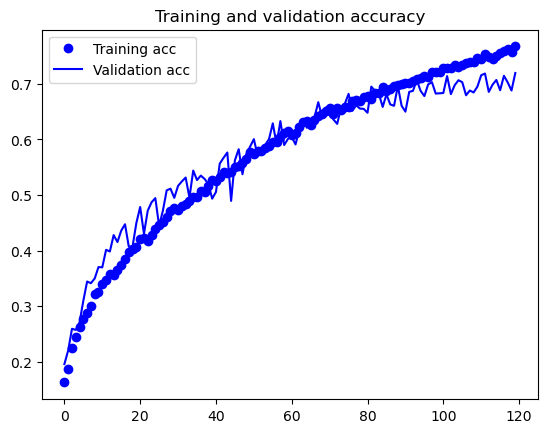

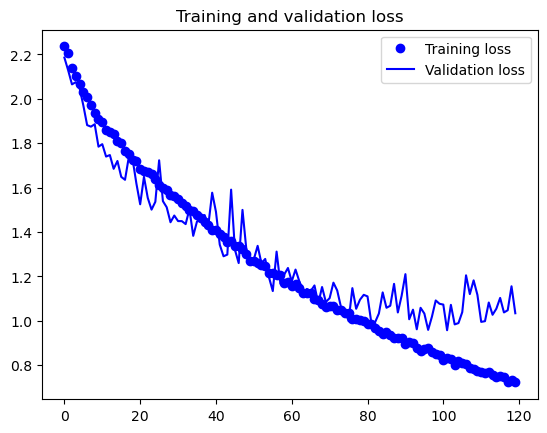

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_4 = keras.models.load_model('Arch_4.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = test_4.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 2s 60ms/step - loss: 0.9430 - acc: 0.7120
Test Loss: 0.9430346488952637
Test Accuracy: 0.7120000123977661


### Test 5: Reverting to ReLu and Testing Average Pooling

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers, models

img_size = 224

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(32, (3, 3)))
model_2.add(layers.Activation('relu'))

# Replace MaxPooling2D with AveragePooling2D
model_2.add(layers.AveragePooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('relu'))

# Replace MaxPooling2D with AveragePooling2D
model_2.add(layers.AveragePooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

# Replace MaxPooling2D with AveragePooling2D
model_2.add(layers.AveragePooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))

# Replace MaxPooling2D with AveragePooling2D
model_2.add(layers.AveragePooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(10, activation='softmax'))




In [4]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 220, 220, 32)      0         
                                                                 
 average_pooling2d (AverageP  (None, 110, 110, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                        

In [5]:
from tensorflow.keras import optimizers

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_5.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_2 = model_2.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
375/375 [==============================] - ETA: 0s - loss: 2.2484 - acc: 0.1564
Epoch 1: val_loss improved from inf to 2.17748, saving model to Arch_5.keras
375/375 [==============================] - 96s 242ms/step - loss: 2.2484 - acc: 0.1564 - val_loss: 2.1775 - val_acc: 0.2110
Epoch 2/120
375/375 [==============================] - ETA: 0s - loss: 2.1640 - acc: 0.2053
Epoch 2: val_loss improved from 2.17748 to 2.05295, saving model to Arch_5.keras
375/375 [==============================] - 89s 238ms/step - loss: 2.1640 - acc: 0.2053 - val_loss: 2.0530 - val_acc: 0.2825
Epoch 3/120
375/375 [==============================] - ETA: 0s - loss: 2.1062 - acc: 0.2348
Epoch 3: val_loss improved from 2.05295 to 1.98557, saving model to Arch_5.keras
375/375 [==============================] - 90s 239ms/step - loss: 2.1062 - acc: 0.2348 - val_loss: 1.9856 - val_acc: 0.2920
Epoch 4/120
375/375 [==============================] - ETA: 0s - loss: 2.0471 - acc: 0.2727
Epoch 4: val_loss imp

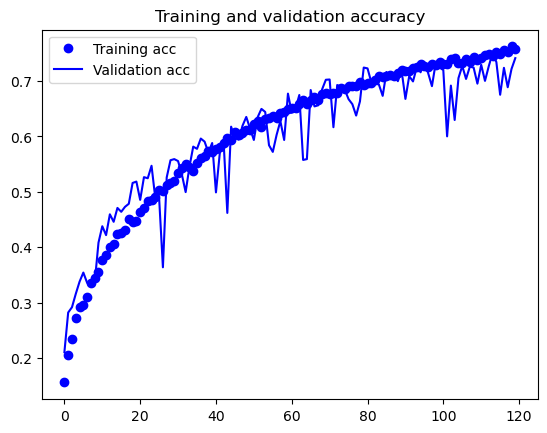

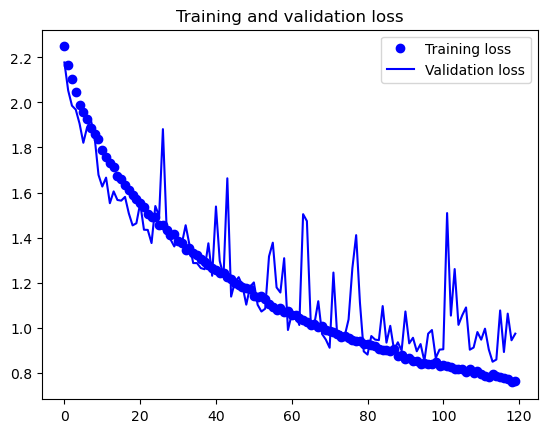

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_5 = keras.models.load_model('Arch_5.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = test_5.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 2s 61ms/step - loss: 0.8492 - acc: 0.7560
Test Loss: 0.8491654992103577
Test Accuracy: 0.7559999823570251


### Test 6: Increasing Model Complexity by adding one more layer before each maxpooling to improve accuracy of model in fewer epochs & Adding Dropout to Try Reducing Model Noise

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers, models

img_size = 224

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(32, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(32, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(64, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Conv2D(128, (3, 3)))
model_2.add(layers.Activation('relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.3))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(10, activation='softmax'))



In [4]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 dropout (Dropout)           (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 220, 220, 32)      0         
                                                                 
 dropout_1 (Dropout)         (None, 220, 220, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9

In [5]:
from tensorflow.keras import optimizers

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_6.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_2 = model_2.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
375/375 [==============================] - ETA: 0s - loss: 2.2975 - acc: 0.1100
Epoch 1: val_loss improved from inf to 2.30061, saving model to Arch_6.keras
375/375 [==============================] - 102s 251ms/step - loss: 2.2975 - acc: 0.1100 - val_loss: 2.3006 - val_acc: 0.1335
Epoch 2/120
375/375 [==============================] - ETA: 0s - loss: 2.2563 - acc: 0.1557
Epoch 2: val_loss improved from 2.30061 to 2.27354, saving model to Arch_6.keras
375/375 [==============================] - 95s 253ms/step - loss: 2.2563 - acc: 0.1557 - val_loss: 2.2735 - val_acc: 0.1270
Epoch 3/120
375/375 [==============================] - ETA: 0s - loss: 2.2196 - acc: 0.1767
Epoch 3: val_loss improved from 2.27354 to 2.24139, saving model to Arch_6.keras
375/375 [==============================] - 95s 254ms/step - loss: 2.2196 - acc: 0.1767 - val_loss: 2.2414 - val_acc: 0.2000
Epoch 4/120
375/375 [==============================] - ETA: 0s - loss: 2.2138 - acc: 0.1845
Epoch 4: val_loss im

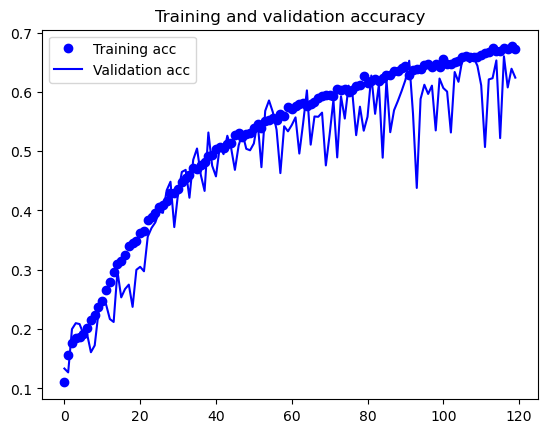

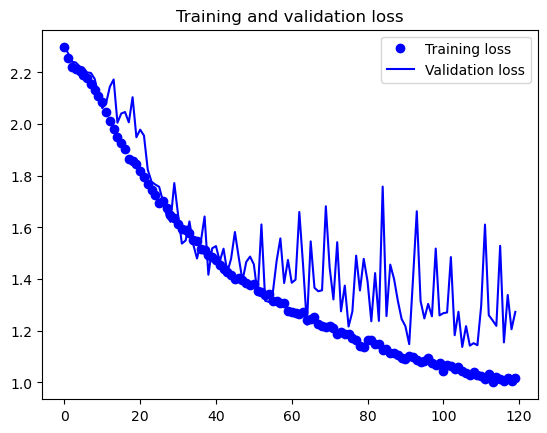

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_6 = keras.models.load_model('Arch_6.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = test_6.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 58ms/step - loss: 1.1812 - acc: 0.6360
Test Loss: 1.1812400817871094
Test Accuracy: 0.6359999775886536


### Test 7: Decreasing Model Complexity back to Test 1 Model and testing batch size for faster training

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(10, activation='softmax'))

In [4]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_7.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
235/235 [==============================] - ETA: 0s - loss: 2.2296 - acc: 0.1757
Epoch 1: val_loss improved from inf to 2.13544, saving model to Arch_7.keras
235/235 [==============================] - 108s 440ms/step - loss: 2.2296 - acc: 0.1757 - val_loss: 2.1354 - val_acc: 0.1945
Epoch 2/120
235/235 [==============================] - ETA: 0s - loss: 2.1100 - acc: 0.2351
Epoch 2: val_loss improved from 2.13544 to 2.08676, saving model to Arch_7.keras
235/235 [==============================] - 104s 442ms/step - loss: 2.1100 - acc: 0.2351 - val_loss: 2.0868 - val_acc: 0.2370
Epoch 3/120
235/235 [==============================] - ETA: 0s - loss: 2.0329 - acc: 0.2728
Epoch 3: val_loss improved from 2.08676 to 2.00197, saving model to Arch_7.keras
235/235 [==============================] - 99s 421ms/step - loss: 2.0329 - acc: 0.2728 - val_loss: 2.0020 - val_acc: 0.2735
Epoch 4/120
235/235 [==============================] - ETA: 0s - loss: 1.9980 - acc: 0.2928
Epoch 4: val_loss i

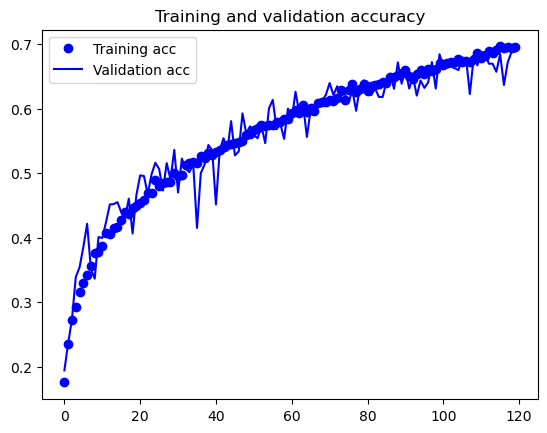

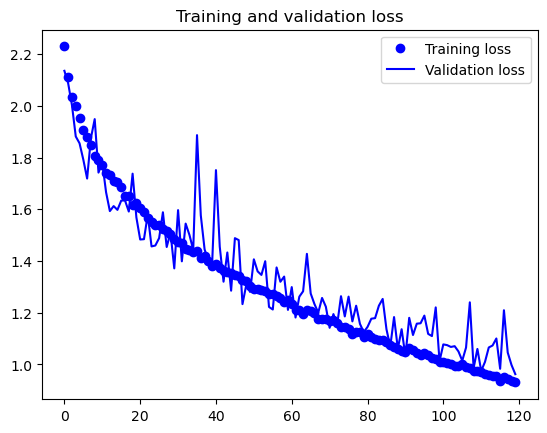

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_7 = keras.models.load_model('Arch_7.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_7.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 4s 111ms/step - loss: 0.9625 - acc: 0.6800
Test Loss: 0.9625046253204346
Test Accuracy: 0.6800000071525574


### Test 8: Increasing Model Complexity by removing 1 max pooling and adding more conv2d layers

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_8 = models.Sequential()
test_8.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_8.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_8.add(layers.MaxPooling2D((2, 2)))

test_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_8.add(layers.MaxPooling2D((2, 2)))

test_8.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_8.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_8.add(layers.MaxPooling2D((2, 2)))

test_8.add(layers.Flatten())
test_8.add(layers.Dense(10, activation='softmax'))

In [4]:
test_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [5]:
from tensorflow.keras import optimizers

test_8.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_8.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_8 = test_8.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
235/235 [==============================] - ETA: 0s - loss: 2.2084 - acc: 0.1824
Epoch 1: val_loss improved from inf to 2.06156, saving model to Arch_8.keras
235/235 [==============================] - 98s 389ms/step - loss: 2.2084 - acc: 0.1824 - val_loss: 2.0616 - val_acc: 0.2505
Epoch 2/120
235/235 [==============================] - ETA: 0s - loss: 2.0742 - acc: 0.2604
Epoch 2: val_loss improved from 2.06156 to 1.95241, saving model to Arch_8.keras
235/235 [==============================] - 96s 408ms/step - loss: 2.0742 - acc: 0.2604 - val_loss: 1.9524 - val_acc: 0.3155
Epoch 3/120
235/235 [==============================] - ETA: 0s - loss: 2.0193 - acc: 0.2785
Epoch 3: val_loss improved from 1.95241 to 1.88049, saving model to Arch_8.keras
235/235 [==============================] - 94s 398ms/step - loss: 2.0193 - acc: 0.2785 - val_loss: 1.8805 - val_acc: 0.3415
Epoch 4/120
235/235 [==============================] - ETA: 0s - loss: 1.9627 - acc: 0.3039
Epoch 4: val_loss did

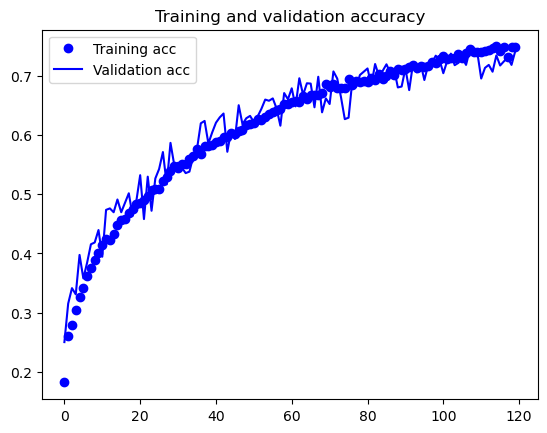

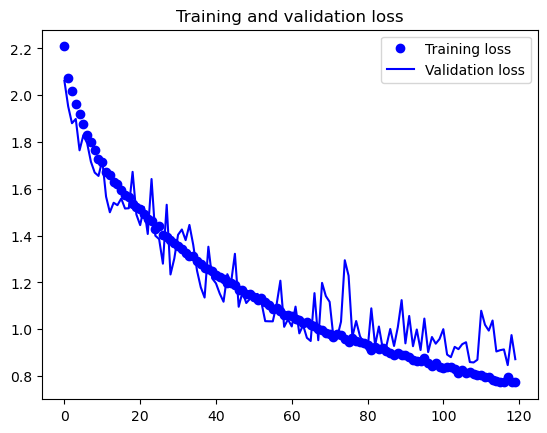

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_8.history['acc']
val_acc = history_8.history['val_acc']
loss = history_8.history['loss']
val_loss = history_8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [2]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_8 = keras.models.load_model('Arch_8.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_8.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 3s 130ms/step - loss: 0.8667 - acc: 0.7600
Test Loss: 0.8667266368865967
Test Accuracy: 0.7599999904632568


### Test 9: Testing optimizer to reduce training time and implementing gradient clipping to reduce noise

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_9 = models.Sequential()
test_9.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_9.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_9.add(layers.MaxPooling2D((2, 2)))

test_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_9.add(layers.MaxPooling2D((2, 2)))

test_9.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_9.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_9.add(layers.MaxPooling2D((2, 2)))

test_9.add(layers.Flatten())
test_9.add(layers.Dense(10, activation='softmax'))

In [4]:
test_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [6]:
from tensorflow.keras import optimizers

test_9.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001, clipvalue=1.0),
              metrics=['acc'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [9]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_9.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_9 = test_9.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
235/235 [==============================] - ETA: 0s - loss: 2.2736 - acc: 0.1329
Epoch 1: val_loss improved from inf to 2.17619, saving model to Arch_9.keras
235/235 [==============================] - 100s 397ms/step - loss: 2.2736 - acc: 0.1329 - val_loss: 2.1762 - val_acc: 0.1910
Epoch 2/120
235/235 [==============================] - ETA: 0s - loss: 2.2009 - acc: 0.1861
Epoch 2: val_loss improved from 2.17619 to 2.12369, saving model to Arch_9.keras
235/235 [==============================] - 91s 386ms/step - loss: 2.2009 - acc: 0.1861 - val_loss: 2.1237 - val_acc: 0.2130
Epoch 3/120
235/235 [==============================] - ETA: 0s - loss: 2.1411 - acc: 0.2200
Epoch 3: val_loss improved from 2.12369 to 2.08113, saving model to Arch_9.keras
235/235 [==============================] - 89s 376ms/step - loss: 2.1411 - acc: 0.2200 - val_loss: 2.0811 - val_acc: 0.2320
Epoch 4/120
235/235 [==============================] - ETA: 0s - loss: 2.0668 - acc: 0.2567
Epoch 4: val_loss im

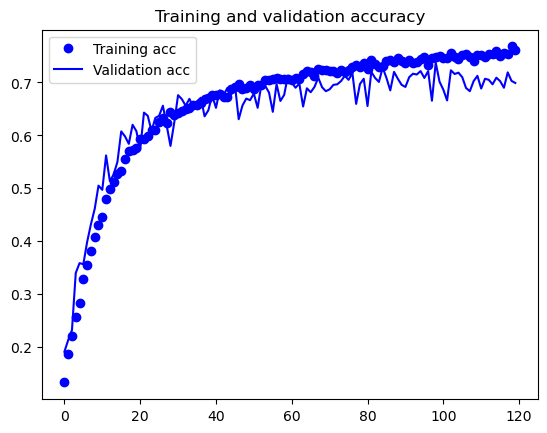

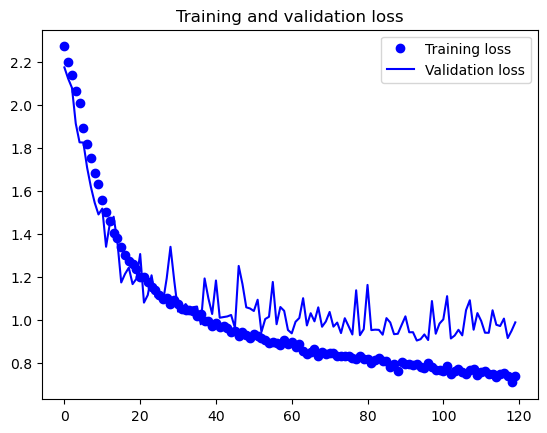

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_9.history['acc']
val_acc = history_9.history['val_acc']
loss = history_9.history['loss']
val_loss = history_9.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_9 = keras.models.load_model('Arch_9.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_9.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 2s 86ms/step - loss: 1.0080 - acc: 0.6960
Test Loss: 1.007997751235962
Test Accuracy: 0.6959999799728394


### Test 10: Reducing Image Size back to 150 to reduce runtime 

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 150

test_10 = models.Sequential()
test_10.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_10.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_10.add(layers.MaxPooling2D((2, 2)))

test_10.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_10.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_10.add(layers.MaxPooling2D((2, 2)))

test_10.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_10.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_10.add(layers.MaxPooling2D((2, 2)))

test_10.add(layers.Flatten())
test_10.add(layers.Dense(10, activation='softmax'))

In [4]:
test_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                    

In [5]:
from tensorflow.keras import optimizers

test_10.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_10.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_10 = test_10.fit(
    train_generator,
    epochs=150,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/150
235/235 [==============================] - ETA: 0s - loss: 2.2298 - acc: 0.1627
Epoch 1: val_loss improved from inf to 2.10436, saving model to Arch_10.keras
235/235 [==============================] - 60s 235ms/step - loss: 2.2298 - acc: 0.1627 - val_loss: 2.1044 - val_acc: 0.2310
Epoch 2/150
235/235 [==============================] - ETA: 0s - loss: 2.0933 - acc: 0.2459
Epoch 2: val_loss did not improve from 2.10436
235/235 [==============================] - 54s 228ms/step - loss: 2.0933 - acc: 0.2459 - val_loss: 2.3030 - val_acc: 0.1695
Epoch 3/150
235/235 [==============================] - ETA: 0s - loss: 2.0239 - acc: 0.2748
Epoch 3: val_loss improved from 2.10436 to 1.89640, saving model to Arch_10.keras
235/235 [==============================] - 54s 230ms/step - loss: 2.0239 - acc: 0.2748 - val_loss: 1.8964 - val_acc: 0.3445
Epoch 4/150
235/235 [==============================] - ETA: 0s - loss: 1.9900 - acc: 0.2943
Epoch 4: val_loss improved from 1.89640 to 1.86564, s

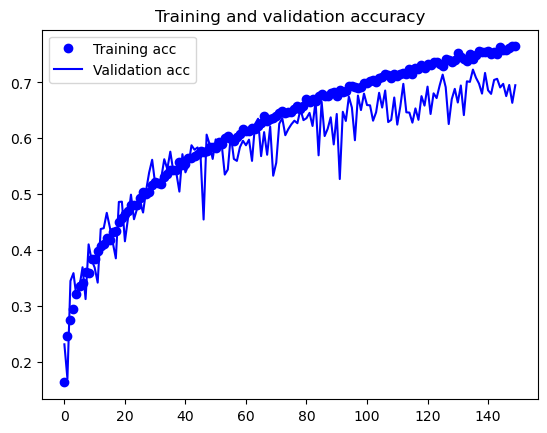

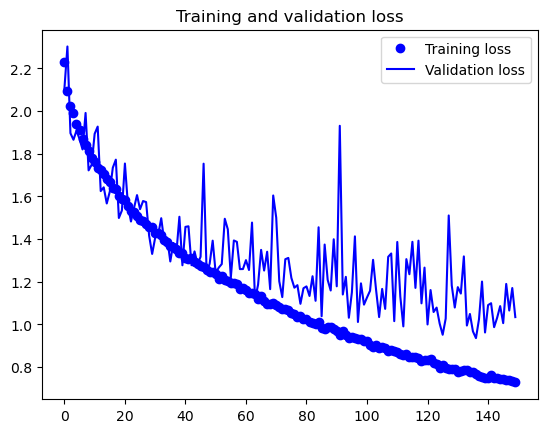

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_10.history['acc']
val_acc = history_10.history['val_acc']
loss = history_10.history['loss']
val_loss = history_10.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 150
test_10 = keras.models.load_model('Arch_10.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_10.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 5s 126ms/step - loss: 0.9263 - acc: 0.7300
Test Loss: 0.9262536764144897
Test Accuracy: 0.7300000190734863


### Test 11: Reverting back to image size 224 and testing noise reduction using learning rate scheduling by using exponential decay as noise is gaussian noise from image data noise

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_11 = models.Sequential()
test_11.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_11.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_11.add(layers.MaxPooling2D((2, 2)))

test_11.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_11.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_11.add(layers.MaxPooling2D((2, 2)))

test_11.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_11.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_11.add(layers.MaxPooling2D((2, 2)))

test_11.add(layers.Flatten())
test_11.add(layers.Dense(10, activation='softmax'))

In [4]:
test_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [5]:


from tensorflow.keras import optimizers

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer = optimizers.RMSprop(learning_rate=lr_schedule)

test_11.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_11.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_11 = test_11.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
235/235 [==============================] - ETA: 0s - loss: 2.2126 - acc: 0.1803
Epoch 1: val_loss improved from inf to 2.04518, saving model to Arch_11.keras
235/235 [==============================] - 104s 414ms/step - loss: 2.2126 - acc: 0.1803 - val_loss: 2.0452 - val_acc: 0.2765
Epoch 2/120
235/235 [==============================] - ETA: 0s - loss: 2.0822 - acc: 0.2557
Epoch 2: val_loss improved from 2.04518 to 1.95535, saving model to Arch_11.keras
235/235 [==============================] - 103s 437ms/step - loss: 2.0822 - acc: 0.2557 - val_loss: 1.9554 - val_acc: 0.3310
Epoch 3/120
235/235 [==============================] - ETA: 0s - loss: 2.0293 - acc: 0.2745
Epoch 3: val_loss did not improve from 1.95535
235/235 [==============================] - 104s 441ms/step - loss: 2.0293 - acc: 0.2745 - val_loss: 1.9640 - val_acc: 0.3070
Epoch 4/120
235/235 [==============================] - ETA: 0s - loss: 1.9737 - acc: 0.2980
Epoch 4: val_loss improved from 1.95535 to 1.89171

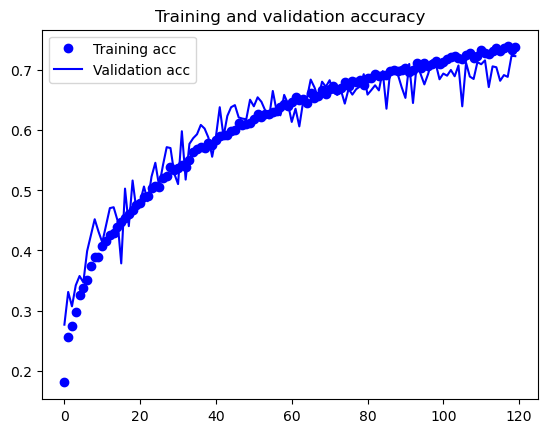

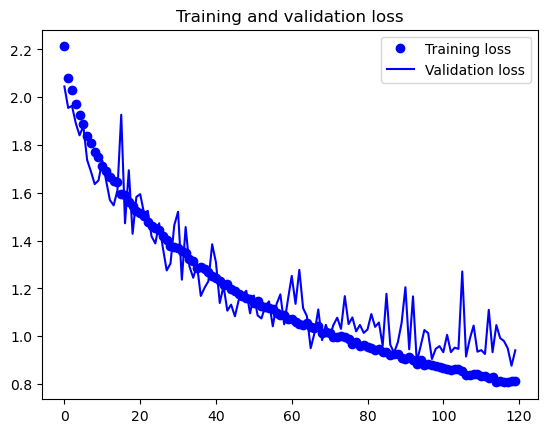

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_11.history['acc']
val_acc = history_11.history['val_acc']
loss = history_11.history['loss']
val_loss = history_11.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_11 = keras.models.load_model('Arch_11.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_11.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 5s 127ms/step - loss: 0.8927 - acc: 0.7240
Test Loss: 0.8926892280578613
Test Accuracy: 0.7239999771118164


### Test 12: Adding one more conv2d layer before each maxpooling as model is still underfitting after 120 epochs

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_12 = models.Sequential()
test_12.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_12.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_12.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_12.add(layers.MaxPooling2D((2, 2)))

test_12.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_12.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_12.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_12.add(layers.MaxPooling2D((2, 2)))

test_12.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_12.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_12.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_12.add(layers.MaxPooling2D((2, 2)))

test_12.add(layers.Flatten())
test_12.add(layers.Dense(10, activation='softmax'))

In [4]:
test_12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 64)      36928     
                                                        

In [5]:
from tensorflow.keras import optimizers

test_12.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_12.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_12 = test_12.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
235/235 [==============================] - ETA: 0s - loss: 2.2320 - acc: 0.1696
Epoch 1: val_loss improved from inf to 2.09812, saving model to Arch_12.keras
235/235 [==============================] - 109s 423ms/step - loss: 2.2320 - acc: 0.1696 - val_loss: 2.0981 - val_acc: 0.2505
Epoch 2/120
235/235 [==============================] - ETA: 0s - loss: 2.1367 - acc: 0.2191
Epoch 2: val_loss improved from 2.09812 to 2.06551, saving model to Arch_12.keras
235/235 [==============================] - 99s 421ms/step - loss: 2.1367 - acc: 0.2191 - val_loss: 2.0655 - val_acc: 0.2635
Epoch 3/120
235/235 [==============================] - ETA: 0s - loss: 2.0661 - acc: 0.2468
Epoch 3: val_loss improved from 2.06551 to 2.00864, saving model to Arch_12.keras
235/235 [==============================] - 100s 424ms/step - loss: 2.0661 - acc: 0.2468 - val_loss: 2.0086 - val_acc: 0.3120
Epoch 4/120
235/235 [==============================] - ETA: 0s - loss: 2.0020 - acc: 0.2912
Epoch 4: val_los

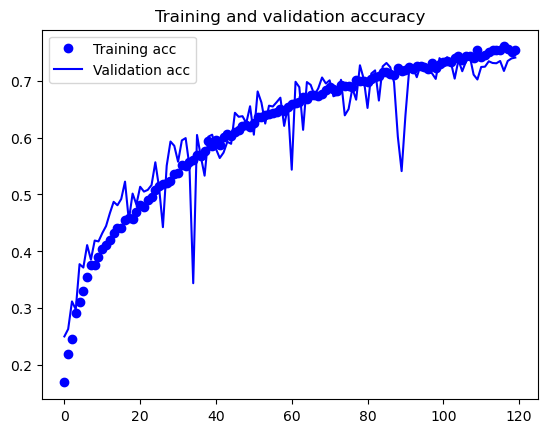

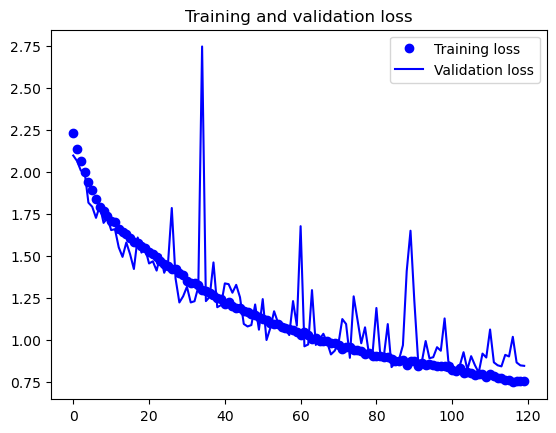

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_12.history['acc']
val_acc = history_12.history['val_acc']
loss = history_12.history['loss']
val_loss = history_12.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [2]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_12 = keras.models.load_model('Arch_12.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_12.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 4s 144ms/step - loss: 0.8245 - acc: 0.7300
Test Loss: 0.8245023488998413
Test Accuracy: 0.7300000190734863


### Test 13: Increasing filter size as model is still underfitting after 120 epochs & Implementing Gradient clipping to reduce noise

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_13 = models.Sequential()
test_13.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_13.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_13.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_13.add(layers.MaxPooling2D((2, 2)))

test_13.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_13.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_13.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_13.add(layers.MaxPooling2D((2, 2)))

test_13.add(layers.Conv2D(256, (3, 3), activation='relu'))
test_13.add(layers.Conv2D(256, (3, 3), activation='relu'))
test_13.add(layers.Conv2D(256, (3, 3), activation='relu'))
test_13.add(layers.MaxPooling2D((2, 2)))

test_13.add(layers.Flatten())
test_13.add(layers.Dense(10, activation='softmax'))

In [4]:
test_13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 128)     73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 128)     147584    
                                                        

In [6]:
from tensorflow.keras import optimizers

test_13.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001, clipvalue = 1.5),
              metrics=['acc'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [9]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_13.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_13 = test_13.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
235/235 [==============================] - ETA: 0s - loss: 2.2331 - acc: 0.1623
Epoch 1: val_loss improved from inf to 2.19370, saving model to Arch_13.keras
235/235 [==============================] - 124s 437ms/step - loss: 2.2331 - acc: 0.1623 - val_loss: 2.1937 - val_acc: 0.1700
Epoch 2/120
235/235 [==============================] - ETA: 0s - loss: 2.1192 - acc: 0.2352
Epoch 2: val_loss did not improve from 2.19370
235/235 [==============================] - 98s 417ms/step - loss: 2.1192 - acc: 0.2352 - val_loss: 2.3152 - val_acc: 0.1920
Epoch 3/120
235/235 [==============================] - ETA: 0s - loss: 2.0490 - acc: 0.2671
Epoch 3: val_loss improved from 2.19370 to 1.95838, saving model to Arch_13.keras
235/235 [==============================] - 98s 414ms/step - loss: 2.0490 - acc: 0.2671 - val_loss: 1.9584 - val_acc: 0.3125
Epoch 4/120
235/235 [==============================] - ETA: 0s - loss: 1.9789 - acc: 0.2999
Epoch 4: val_loss improved from 1.95838 to 1.86199, 

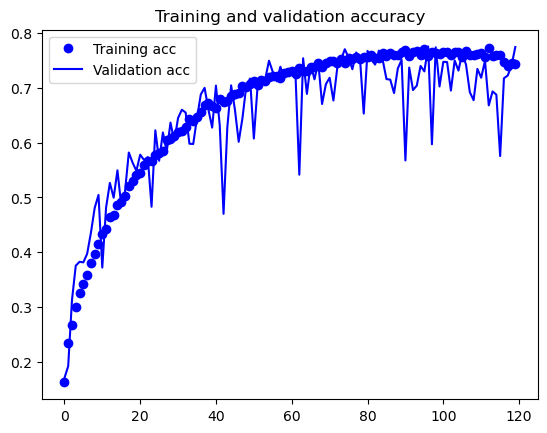

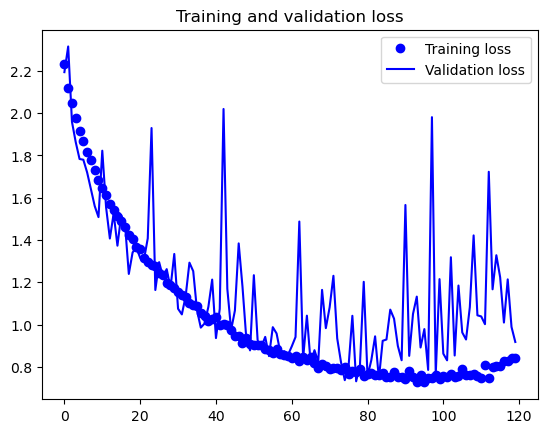

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_13.history['acc']
val_acc = history_13.history['val_acc']
loss = history_13.history['loss']
val_loss = history_13.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_13 = keras.models.load_model('Arch_13.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_13.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 11s 313ms/step - loss: 0.7420 - acc: 0.7900
Test Loss: 0.741989016532898
Test Accuracy: 0.7900000214576721


### Test 14: Model became too complex by increasing filter size so I will reduce filter size. However, model is training too slowly so I will increase learning rate and manage the increase of learning rate by increasing gradient clipping

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_14 = models.Sequential()
test_14.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_14.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_14.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_14.add(layers.MaxPooling2D((2, 2)))

test_14.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_14.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_14.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_14.add(layers.MaxPooling2D((2, 2)))

test_14.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_14.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_14.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_14.add(layers.MaxPooling2D((2, 2)))

test_14.add(layers.Flatten())
test_14.add(layers.Dense(10, activation='softmax'))

In [4]:
test_14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 64)      36928     
                                                        

In [5]:
from tensorflow.keras import optimizers

test_14.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0005, clipvalue = 2.0),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_14.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_14 = test_14.fit(
    train_generator,
    epochs=120,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/120
235/235 [==============================] - ETA: 0s - loss: 2.2857 - acc: 0.1409
Epoch 1: val_loss improved from inf to 2.14260, saving model to Arch_14.keras
235/235 [==============================] - 124s 488ms/step - loss: 2.2857 - acc: 0.1409 - val_loss: 2.1426 - val_acc: 0.2205
Epoch 2/120
235/235 [==============================] - ETA: 0s - loss: 2.1595 - acc: 0.2104
Epoch 2: val_loss improved from 2.14260 to 2.07328, saving model to Arch_14.keras
235/235 [==============================] - 106s 450ms/step - loss: 2.1595 - acc: 0.2104 - val_loss: 2.0733 - val_acc: 0.2380
Epoch 3/120
235/235 [==============================] - ETA: 0s - loss: 2.0234 - acc: 0.2736
Epoch 3: val_loss improved from 2.07328 to 1.94279, saving model to Arch_14.keras
235/235 [==============================] - 103s 438ms/step - loss: 2.0234 - acc: 0.2736 - val_loss: 1.9428 - val_acc: 0.2950
Epoch 4/120
235/235 [==============================] - ETA: 0s - loss: 1.9189 - acc: 0.3157
Epoch 4: val_lo

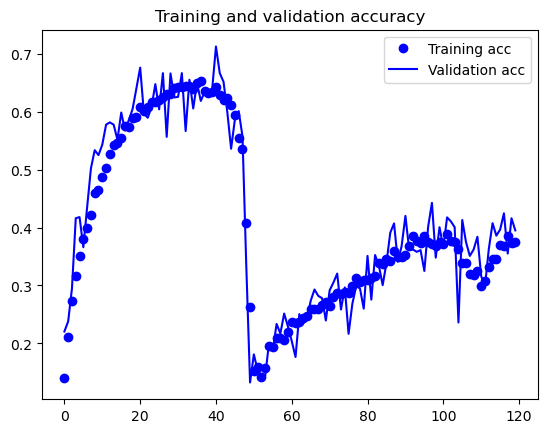

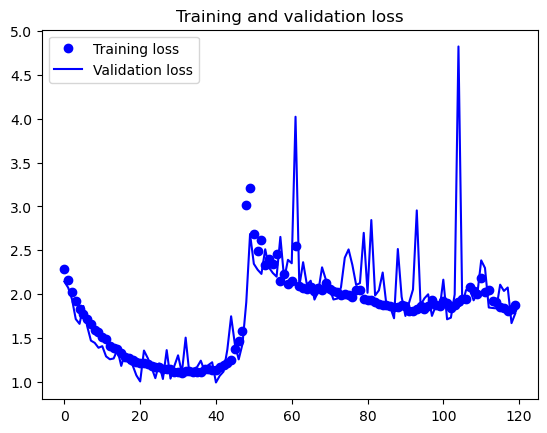

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_14.history['acc']
val_acc = history_14.history['val_acc']
loss = history_14.history['loss']
val_loss = history_14.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test 15: Testing swish activation function with new architecture to see if it reduces noise and has higher accuracy

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_15 = models.Sequential()
test_15.add(layers.Conv2D(32, (3, 3), activation='swish',
                        input_shape=(img_size, img_size, 3)))

test_15.add(layers.Conv2D(32, (3, 3), activation='swish'))
test_15.add(layers.Conv2D(32, (3, 3), activation='swish'))
test_15.add(layers.MaxPooling2D((2, 2)))

test_15.add(layers.Conv2D(64, (3, 3), activation='swish'))
test_15.add(layers.Conv2D(64, (3, 3), activation='swish'))
test_15.add(layers.Conv2D(64, (3, 3), activation='swish'))
test_15.add(layers.MaxPooling2D((2, 2)))

test_15.add(layers.Conv2D(128, (3, 3), activation='swish'))
test_15.add(layers.Conv2D(128, (3, 3), activation='swish'))
test_15.add(layers.Conv2D(128, (3, 3), activation='swish'))
test_15.add(layers.MaxPooling2D((2, 2)))

test_15.add(layers.Flatten())
test_15.add(layers.Dense(10, activation='softmax'))

In [4]:
test_15.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 64)      36928     
                                                        

In [5]:
from tensorflow.keras import optimizers

test_15.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_15.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_15 = test_15.fit(
    train_generator,
    epochs=140,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/140
235/235 [==============================] - ETA: 0s - loss: 2.2474 - acc: 0.1557
Epoch 1: val_loss improved from inf to 2.18242, saving model to Arch_15.keras
235/235 [==============================] - 107s 419ms/step - loss: 2.2474 - acc: 0.1557 - val_loss: 2.1824 - val_acc: 0.2055
Epoch 2/140
235/235 [==============================] - ETA: 0s - loss: 2.2115 - acc: 0.1785
Epoch 2: val_loss improved from 2.18242 to 2.14259, saving model to Arch_15.keras
235/235 [==============================] - 105s 448ms/step - loss: 2.2115 - acc: 0.1785 - val_loss: 2.1426 - val_acc: 0.2200
Epoch 3/140
235/235 [==============================] - ETA: 0s - loss: 2.1660 - acc: 0.2133
Epoch 3: val_loss improved from 2.14259 to 2.11731, saving model to Arch_15.keras
235/235 [==============================] - 103s 438ms/step - loss: 2.1660 - acc: 0.2133 - val_loss: 2.1173 - val_acc: 0.2375
Epoch 4/140
235/235 [==============================] - ETA: 0s - loss: 2.1507 - acc: 0.2187
Epoch 4: val_lo

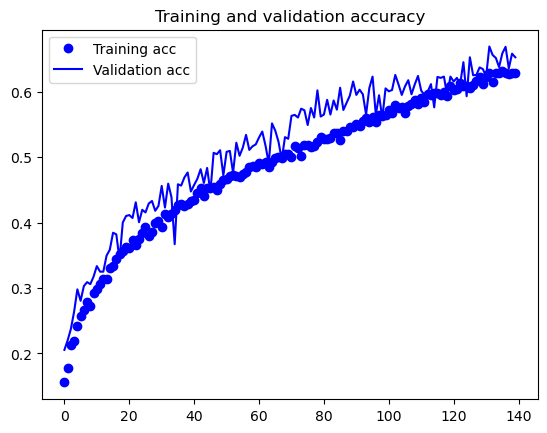

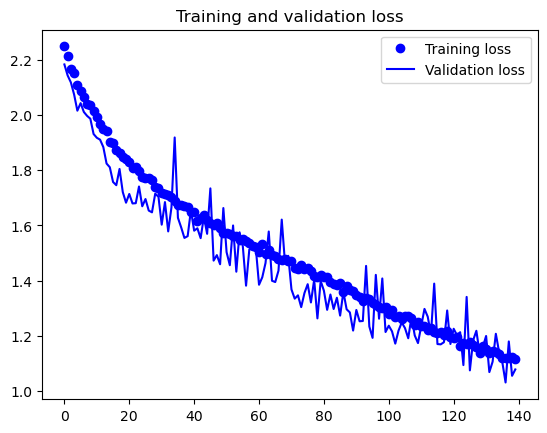

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_15.history['acc']
val_acc = history_15.history['val_acc']
loss = history_15.history['loss']
val_loss = history_15.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Test 16: Finding when model overfits with Relu. Switched back to relu activation function as swish function was still underfitting even after 140 epochs

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_16 = models.Sequential()
test_16.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_16.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_16.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_16.add(layers.MaxPooling2D((2, 2)))

test_16.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_16.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_16.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_16.add(layers.MaxPooling2D((2, 2)))

test_16.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_16.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_16.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_16.add(layers.MaxPooling2D((2, 2)))

test_16.add(layers.Flatten())
test_16.add(layers.Dense(10, activation='softmax'))

In [4]:
test_16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 64)      36928     
                                                        

In [5]:
from tensorflow.keras import optimizers

test_16.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_16.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_16 = test_16.fit(
    train_generator,
    epochs=180,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/180
235/235 [==============================] - ETA: 0s - loss: 2.2346 - acc: 0.1571
Epoch 1: val_loss improved from inf to 2.18036, saving model to Arch_16.keras
235/235 [==============================] - 105s 407ms/step - loss: 2.2346 - acc: 0.1571 - val_loss: 2.1804 - val_acc: 0.1670
Epoch 2/180
235/235 [==============================] - ETA: 0s - loss: 2.1283 - acc: 0.2227
Epoch 2: val_loss improved from 2.18036 to 2.08405, saving model to Arch_16.keras
235/235 [==============================] - 115s 488ms/step - loss: 2.1283 - acc: 0.2227 - val_loss: 2.0840 - val_acc: 0.2400
Epoch 3/180
235/235 [==============================] - ETA: 0s - loss: 2.0533 - acc: 0.2596
Epoch 3: val_loss did not improve from 2.08405
235/235 [==============================] - 114s 484ms/step - loss: 2.0533 - acc: 0.2596 - val_loss: 2.1402 - val_acc: 0.2225
Epoch 4/180
235/235 [==============================] - ETA: 0s - loss: 2.0141 - acc: 0.2785
Epoch 4: val_loss improved from 2.08405 to 1.87656

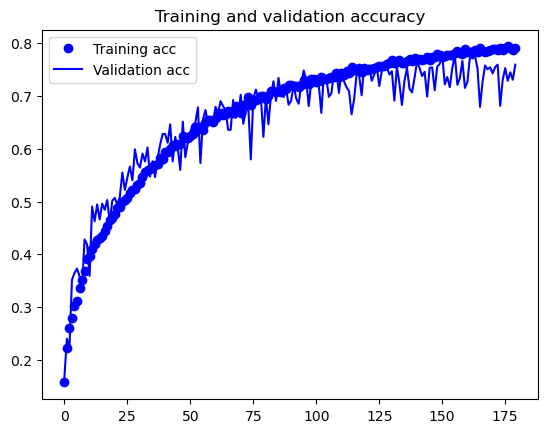

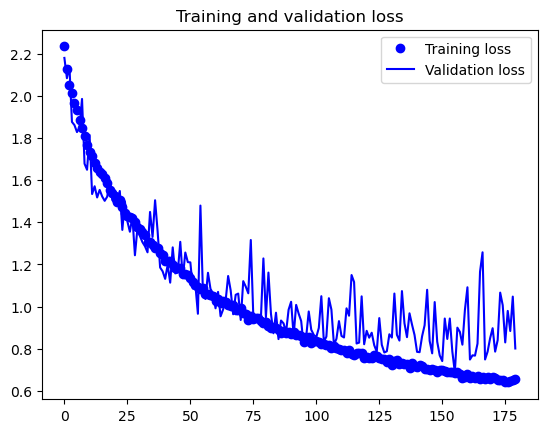

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_16.history['acc']
val_acc = history_16.history['val_acc']
loss = history_16.history['loss']
val_loss = history_16.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_16 = keras.models.load_model('Arch_16.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_16.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 2s 90ms/step - loss: 0.7399 - acc: 0.8000
Test Loss: 0.7399322986602783
Test Accuracy: 0.800000011920929


### Test 17: Effects of Dropout. Used a lower dropout rate as model was overfitting slowly

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 224

test_17 = models.Sequential()
test_17.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))

test_17.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_17.add(layers.Conv2D(32, (3, 3), activation='relu'))
test_17.add(layers.MaxPooling2D((2, 2)))
test_17.add(layers.Dropout(0.4))

test_17.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_17.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_17.add(layers.Conv2D(64, (3, 3), activation='relu'))
test_17.add(layers.MaxPooling2D((2, 2)))
test_17.add(layers.Dropout(0.4))

test_17.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_17.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_17.add(layers.Conv2D(128, (3, 3), activation='relu'))
test_17.add(layers.MaxPooling2D((2, 2)))
test_17.add(layers.Dropout(0.4))

test_17.add(layers.Flatten())
test_17.add(layers.Dense(10, activation='softmax'))

In [4]:
test_17.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 109, 109, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 64)      18496     
                                                        

In [5]:
from tensorflow.keras import optimizers

test_17.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    featurewise_center=False,
    featurewise_std_normalization=False, 
    preprocessing_function=None
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Arch_17.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history_17 = test_17.fit(
    train_generator,
    epochs=220,
    validation_data=validation_generator,
    callbacks=[mc]
)

Epoch 1/220
235/235 [==============================] - ETA: 0s - loss: 2.2532 - acc: 0.1500
Epoch 1: val_loss improved from inf to 2.18193, saving model to Arch_17.keras
235/235 [==============================] - 110s 426ms/step - loss: 2.2532 - acc: 0.1500 - val_loss: 2.1819 - val_acc: 0.1975
Epoch 2/220
235/235 [==============================] - ETA: 0s - loss: 2.1854 - acc: 0.1980
Epoch 2: val_loss improved from 2.18193 to 2.13436, saving model to Arch_17.keras
235/235 [==============================] - 106s 451ms/step - loss: 2.1854 - acc: 0.1980 - val_loss: 2.1344 - val_acc: 0.2525
Epoch 3/220
235/235 [==============================] - ETA: 0s - loss: 2.1384 - acc: 0.2225
Epoch 3: val_loss improved from 2.13436 to 2.07153, saving model to Arch_17.keras
235/235 [==============================] - 104s 442ms/step - loss: 2.1384 - acc: 0.2225 - val_loss: 2.0715 - val_acc: 0.2455
Epoch 4/220
235/235 [==============================] - ETA: 0s - loss: 2.1052 - acc: 0.2369
Epoch 4: val_lo

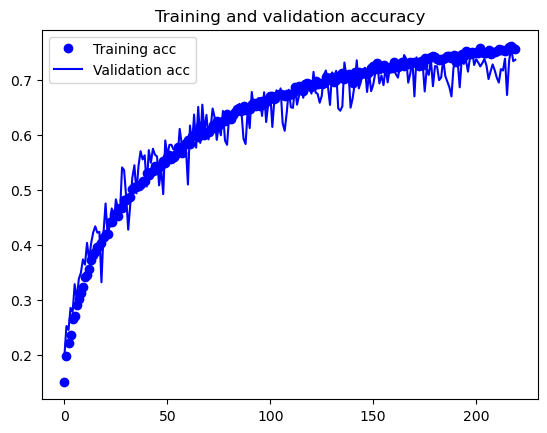

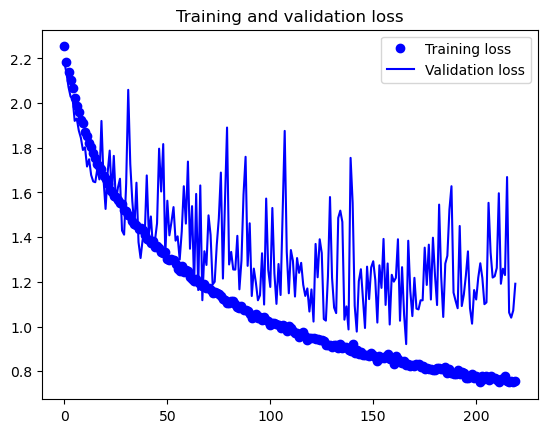

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history_17.history['acc']
val_acc = history_17.history['val_acc']
loss = history_17.history['loss']
val_loss = history_17.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
test_17 = keras.models.load_model('Arch_17.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = test_17.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 2s 93ms/step - loss: 0.9752 - acc: 0.7400
Test Loss: 0.9752269983291626
Test Accuracy: 0.7400000095367432
